# The Quarterly Japanese Economic Model (Q-JEM)
This workbook implement the "The Quarterly Japanese Economic Model (Q-JEM): 2019 version". 

At http://www.boj.or.jp/en/research/wps_rev/wps_2019/wp19e07.htm/ you will find the working paper describing 
the model and a zipfile containing all the relevant information needed to use the model. 

The model logic has been transformed from Eview equation to ModelFlow Business logic and the dataseries has been transformed to a Pandas Dataframe. 

In this workbook the impulse responses from the working paper section 3.1.1, 3.1.2, 3.1.3, and 3.1.4 has been recreated. 

## Import Python libraries

In [34]:
import pandas as pd 

import modelmf
from modelclass import model
model.modelflow_auto()

## Create model and dataframe 

In [14]:
mqjem, baseline = model.modelload('qjem.pcim',run=1)

## Define some variable labels 

In [16]:
legend = {
'GDP'   : 'Real gross domestic product, S.A.',
'CP'    : 'Real private consumption, S.A.',
'U'     : 'Unemployment rate, S.A.',
'PGDP'  : 'GDP deflator',
'USGDP' : 'Real gross domestic product of the United States, S.A.',
'NUSGDP': 'Output gap of the rest of the world',
'EX': 'Real exports of goods and services, S.A.',
'IM' : 'Real imports of goods and services, S.A.',
'INV' : 'Real private non-residential investment, S.A.',
'CORE_CPI' : 'Consumer price index (all items, less fresh food), S.A.'
}

## Make experiment with Foreign GDP +1 percent point. 

In [17]:
instruments = [ 'V_NUSGAP','V_USGAP']
target      = baseline.loc['2005q1':,['USGDP','NUSGDP']].mfcalc('''\
USGDP  = USGDP*1.01
NUSGDP = NUSGDP*1.01
''',silent=1)
mqjem.invert(baseline,target,instruments); 

## Display the results 

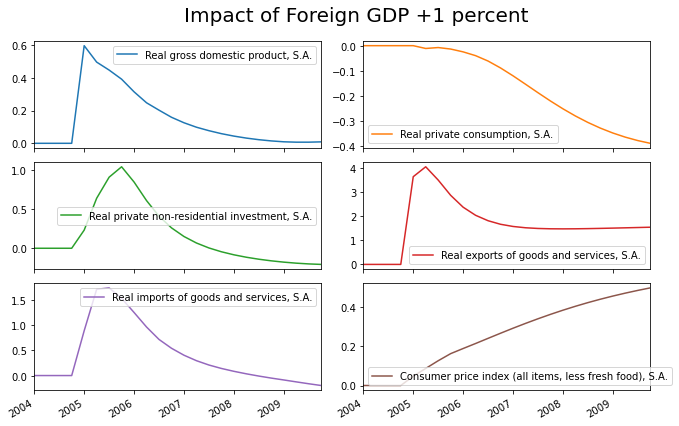

In [18]:
disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.mul100.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of Foreign GDP +1 percent',top=0.9)

## Lower Oil prices  

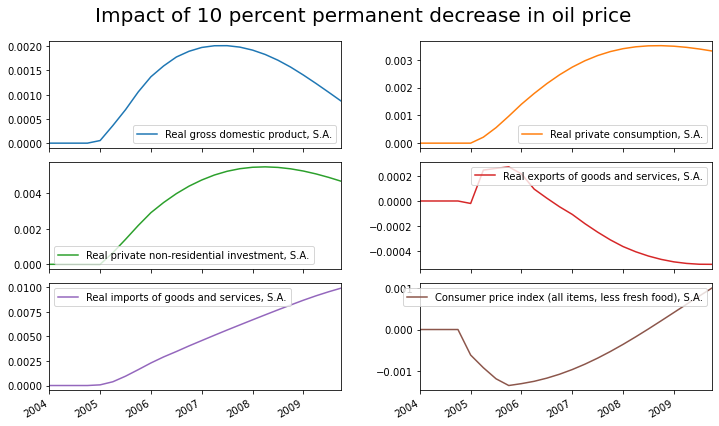

In [19]:
instruments = [ 'V_POIL']
target      = baseline.loc['2005q1':,['POIL']].mfcalc('''\
POIL  = POIL*0.9
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of 10 percent permanent decrease in oil price',top=0.9)

## Combine the two previous experiments 

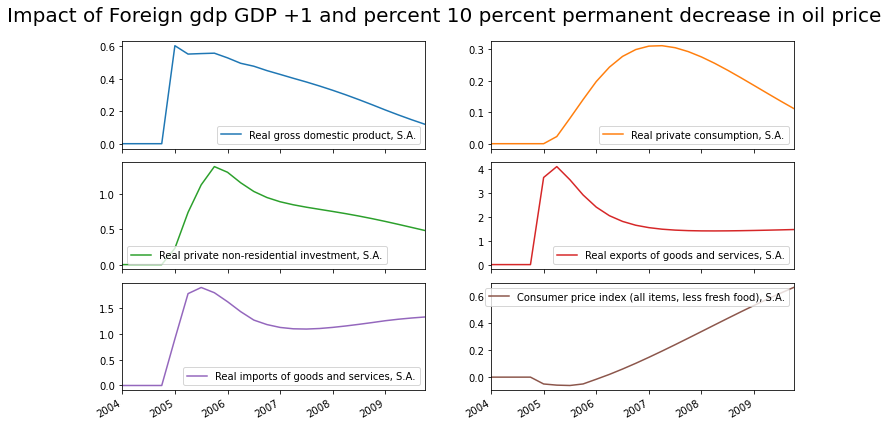

In [20]:
instruments = [ 'V_POIL','V_NUSGAP','V_USGAP']
target      = baseline.loc['2005q1':,['POIL','USGDP','NUSGDP']].mfcalc('''\
POIL  = POIL*0.9
USGDP  = USGDP*1.01
NUSGDP = NUSGDP*1.01
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.mul100.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of Foreign gdp GDP +1 and percent 10 percent permanent decrease in oil price',top=0.9)

## A permanent depreciation of exchange rates. 

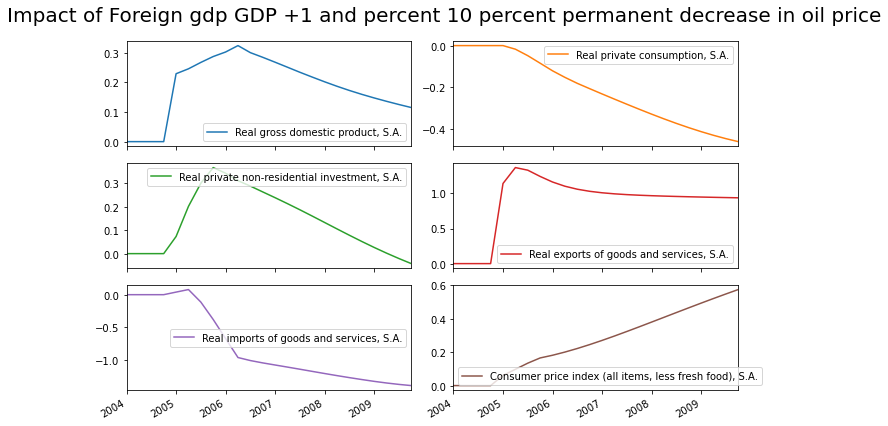

In [21]:
instruments = [ 'V_FXYEN']
target      = baseline.loc['2005q1':,['FXYEN']].mfcalc('''\
FXYEN = FXYEN*1.1
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.mul100.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of Foreign gdp GDP +1 and percent 10 percent permanent decrease in oil price',top=0.9)

## Draw the causal structure current periode, used when solving

In [35]:
#mqjem.plotadjacency(size=(19,19));  # delete the # in front tp display, takes some time

## Draw the causal structuretaking all lags, the economic feedback  

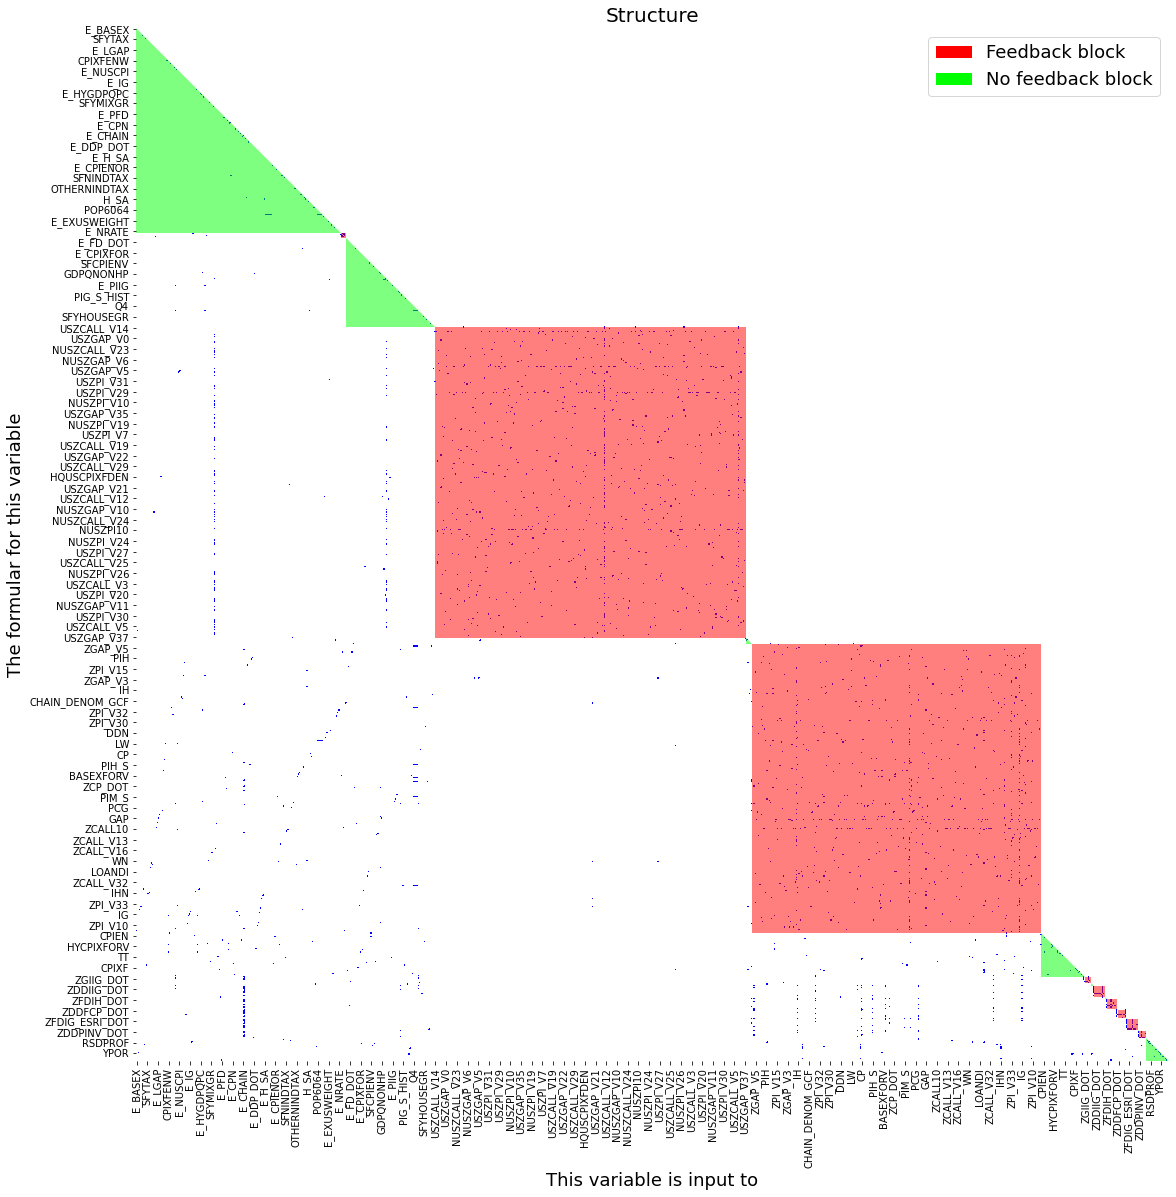

In [32]:
#mqjem.plotadjacency(nolag=True,size=(19,19)); # delete the # in front tp display, takes some time

## How is CPQ determined 

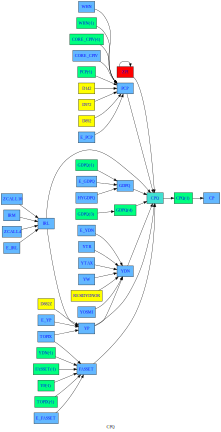

In [23]:
mqjem.cpq.draw(up=2,down=2,HR=0,svg=1,transdic= {'ZPI*' : 'ZPI'}) # we condens all ZPI to one, to make the chart easy

## Also with values 
The result can be inspected in the graph/subfolder in PDF format. 

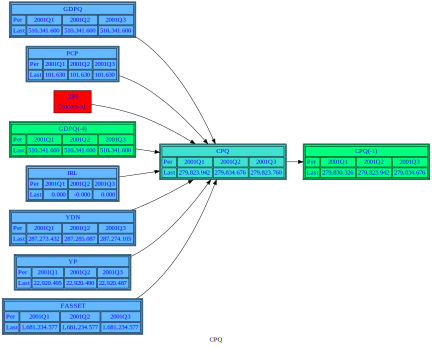

In [29]:
with mqjem.set_smpl('2001q1','2001q3'):
    mqjem.cpq.draw(up=1,down=1,HR=0,svg=1,transdic= {'ZPI*' : 'ZPI'},last=1) # we condens all ZPI to one, to make the chart easy

## Another Example 

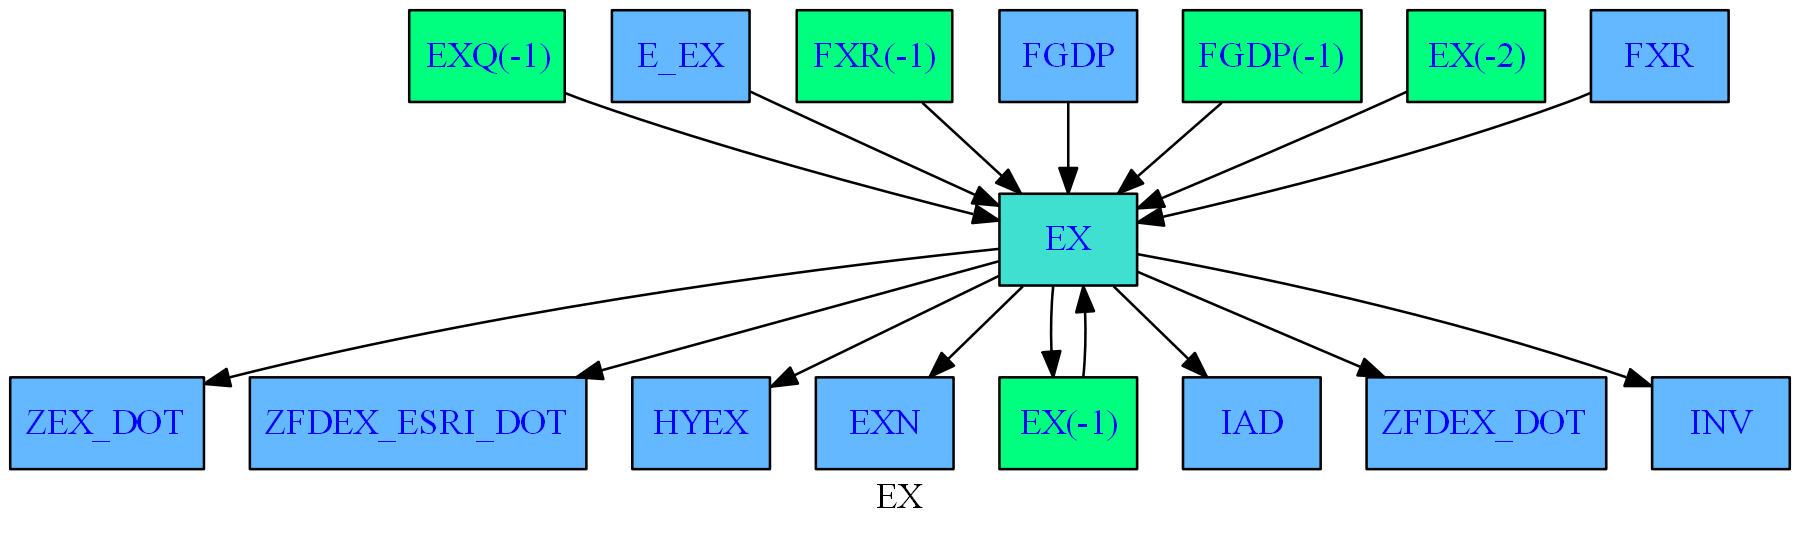

In [30]:
mqjem.ex.draw(up=1,down=1)

In [31]:
mqjem.ex

Endogeneous: EX 
Formular: FRML  <> EX = EX(-1)*EXP(E_EX + -0.02639388470328797 + -0.2283080859599746*LOG(EX(-1)/EXQ(-1)) + 0.228685192555833*LOG(EX(-1)/EX(-2)) + 3.603159894694305*LOG(FGDP/FGDP(-1)) + -0.139651427723068*LOG(FXR/FXR(-1))) $
Values : 
            2004Q1        2004Q2        2004Q3        2004Q4        2005Q1  \
Base  83527.999997  83527.999994  83527.999993  83527.999993  83527.999992   
Last  83527.999997  83527.999994  83527.999993  83527.999993  84480.985408   
Diff      0.000000      0.000000      0.000000      0.000000    952.985416   

            2005Q2        2005Q3        2005Q4        2006Q1        2006Q2  \
Base  83527.999992  83527.999991  83527.999992  83527.999992  83527.999994   
Last  84670.338819  84639.414385  84564.981785  84498.657965  84448.614261   
Diff   1142.338827   1111.414394   1036.981793    970.657973    920.614267   

      ...        2007Q3        2007Q4        2008Q1        2008Q2  \
Base  ...  83527.999998  83527.999998  83527.999999  8